
# Exploratory Data Analysis of Indian Crime Statistics

This notebook performs an Exploratory Data Analysis (EDA) on a dataset containing crime statistics from different cities in India. The goal is to uncover patterns and insights in the data regarding types of crime, victim demographics, locations, weapons used, and resolution rates.

---


## Data Visualization
Visualizing the data to identify trends and patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Loading the Dataset
We begin by loading the crime dataset into a pandas DataFrame.

In [2]:
df=pd.read_csv('crime_dataset_india.csv')

## Viewing Initial Rows
Let’s take a look at the first few rows of the dataset to understand its structure and features.

In [4]:
df.head(4)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00


In [3]:
print ('dimension=',df.ndim)
print('shape=',df.shape)
print('size=',df.size)
print('index=',df.index)

dimension= 2
shape= (40160, 14)
size= 562240
index= RangeIndex(start=0, stop=40160, step=1)


## Statistical Summary
This section provides summary statistics for the numerical columns.

In [11]:
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [13]:
df['Victim Age'].describe()

count    40160.00000
mean        44.49126
std         20.22555
min         10.00000
25%         27.00000
50%         44.00000
75%         62.00000
max         79.00000
Name: Victim Age, dtype: float64

## Dataset Information
Here we examine the data types and non-null counts for each column.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [16]:
## Here we rename the column
df.rename(columns={'Victim Gender':'Victim sex'},inplace=True)

In [18]:
for col in df:
  print(col)

Report Number
Date Reported
Date of Occurrence
Time of Occurrence
City
Crime Code
Crime Description
Victim Age
Victim sex
Weapon Used
Crime Domain
Police Deployed
Case Closed
Date Case Closed


## Frequency Distribution
Checking frequency of unique values in certain columns.

In [20]:
df['Crime Description'].value_counts()

BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
ASSAULT                1915
TRAFFIC VIOLATION      1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: Crime Description, dtype: int64

## Grouped Analysis
Analyzing trends based on groups like city, crime type, gender, or weapon used.

In [25]:
df.groupby('City')['Police Deployed'].sum()

City
Agra              7802
Ahmedabad        18208
Bangalore        35709
Bhopal            6824
Chennai          25516
Delhi            53719
Faridabad         3488
Ghaziabad         7164
Hyderabad        28580
Indore            6983
Jaipur           14881
Kalyan            3469
Kanpur           11233
Kolkata          25011
Lucknow          14467
Ludhiana          7611
Meerut            3860
Mumbai           44507
Nagpur           10575
Nashik            3643
Patna             6949
Pune             21964
Rajkot            3077
Srinagar          3692
Surat            11236
Thane             7160
Varanasi          3643
Vasai             3550
Visakhapatnam     7330
Name: Police Deployed, dtype: int64

#  Selecting Data with loc[]

We use the `loc[]` function in pandas to access groups of rows and columns by labels or boolean conditions




In [4]:
df.loc[[0,1]]

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN


In [30]:
df.loc[0:12]

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim sex,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
5,6,02-01-2020 03:00,01-01-2020 05:00,01-01-2020 17:09,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,30-03-2020 03:00
6,7,01-01-2020 16:00,01-01-2020 06:00,01-01-2020 14:08,Chennai,172,VEHICLE - STOLEN,64,F,Knife,Violent Crime,13,Yes,24-03-2020 16:00
7,8,02-01-2020 10:00,01-01-2020 07:00,02-01-2020 06:33,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,NaN
8,9,04-01-2020 03:00,01-01-2020 08:00,02-01-2020 06:34,Mumbai,338,EXTORTION,41,X,Blunt Object,Other Crime,1,No,NaN
9,10,03-01-2020 07:00,01-01-2020 09:00,01-01-2020 17:50,Chennai,497,PUBLIC INTOXICATION,29,M,Knife,Other Crime,4,No,NaN


In [35]:
df.loc[df['Victim Age']  > 75]

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim sex,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
7,8,02-01-2020 10:00,01-01-2020 07:00,02-01-2020 06:33,Chennai,169,COUNTERFEITING,78,X,Knife,Other Crime,8,No,NaN
14,15,02-01-2020 00:00,01-01-2020 14:00,01-01-2020 22:28,Bangalore,266,SEXUAL ASSAULT,77,F,None,Violent Crime,19,No,NaN
23,24,03-01-2020 09:00,01-01-2020 23:00,01-01-2020 23:40,Chennai,322,VANDALISM,77,F,Other,Other Crime,18,No,NaN
48,49,05-01-2020 19:00,01-03-2020 00:00,03-01-2020 02:59,Jaipur,139,ILLEGAL POSSESSION,77,F,Firearm,Other Crime,17,No,NaN
120,121,07-01-2020 14:00,01-06-2020 00:00,06-01-2020 12:16,Ahmedabad,277,VEHICLE - STOLEN,78,F,Firearm,Violent Crime,10,Yes,22-01-2020 14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40106,40107,31-07-2024 12:00,07-29-2024 02:00,29-07-2024 19:29,Bangalore,453,SHOPLIFTING,79,F,Poison,Other Crime,4,No,NaN
40107,40108,30-07-2024 11:00,07-29-2024 03:00,29-07-2024 09:42,Srinagar,428,COUNTERFEITING,77,M,Explosives,Other Crime,7,No,NaN
40117,40118,01-08-2024 12:00,07-29-2024 13:00,29-07-2024 19:27,Ludhiana,418,ARSON,76,M,Blunt Object,Fire Accident,13,No,NaN
40144,40145,31-07-2024 22:00,07-30-2024 16:00,31-07-2024 12:30,Lucknow,508,EXTORTION,76,M,Knife,Other Crime,5,Yes,27-08-2024 22:00


In [37]:
df.loc[0,['City'] ]

City    Ahmedabad
Name: 0, dtype: object

In [38]:
df.loc[df['Victim Age']  > 75, ['City','Crime Description']]

,City,Crime Description
7,Chennai,COUNTERFEITING
14,Bangalore,SEXUAL ASSAULT
23,Chennai,VANDALISM
48,Jaipur,ILLEGAL POSSESSION
120,Ahmedabad,VEHICLE - STOLEN
...,...,...
40106,Bangalore,SHOPLIFTING
40107,Srinagar,COUNTERFEITING
40117,Ludhiana,ARSON
40144,Lucknow,EXTORTION


# Selecting Data with `iloc[]`

The `iloc[]` function in pandas is used to access rows and columns **by integer positions** (i.e., using numerical indices).


In [40]:
df.iloc[:,4]

0        Ahmedabad
1          Chennai
2         Ludhiana
3             Pune
4             Pune
           ...    
40155      Kolkata
40156       Mumbai
40157       Kanpur
40158        Patna
40159        Delhi
Name: City, Length: 40160, dtype: object

In [44]:
df.iloc[3,4]

'Pune'

In [46]:
## creating new column

df['pincode']=None
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim sex,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,pincode
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,None
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,None
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,None
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,None
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN,None
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,None,Other Crime,2,Yes,29-09-2024 14:00,None
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN,None
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN,None


In [ ]:
## here by using drop function of pandas we can drop column
df.drop(columns=['pincode'])

In [56]:
df.dtypes

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim sex            object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object

In [6]:
## here we chnage the datatype unsing pandas function

df['Report Number']=pd.to_numeric(df['Report Number'])
df['Date Reported']=pd.to_datetime(df['Date Reported'])
df['Date of Occurrence']=pd.to_datetime(df['Date of Occurrence'])
df['Date Case Closed']=pd.to_datetime(df['Date Case Closed'])



In [61]:
df.dtypes

Report Number                  int64
Date Reported         datetime64[ns]
Date of Occurrence    datetime64[ns]
Time of Occurrence            object
City                          object
Crime Code                     int64
Crime Description             object
Victim Age                     int64
Victim sex                    object
Weapon Used                   object
Crime Domain                  object
Police Deployed                int64
Case Closed                   object
Date Case Closed      datetime64[ns]
dtype: object

In [7]:
#handling missing values


df.isnull().sum()


Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [73]:
## check duplicate values
df.duplicated().sum()

0

In [8]:
## here we created pivot table

df.pivot_table(index='Crime Domain',
               columns='City',
               values='Weapon Used',
               aggfunc='count',
               fill_value=0)

City,Agra,Ahmedabad,Bangalore,Bhopal,Chennai,Delhi,Faridabad,Ghaziabad,Hyderabad,Indore,...,Nashik,Patna,Pune,Rajkot,Srinagar,Surat,Thane,Varanasi,Vasai,Visakhapatnam
Crime Domain,,,,,,,,,,,,,,,,,,,,,
Fire Accident,83,168,318,66,260,518,36,59,290,73,...,42,67,198,25,37,92,55,43,31,79
Other Crime,420,1009,2096,396,1432,3125,184,397,1601,380,...,203,382,1302,187,213,641,417,203,205,397
Traffic Fatality,33,81,166,31,110,198,18,42,135,32,...,15,30,110,19,22,72,29,18,21,45
Violent Crime,228,559,1008,197,691,1559,116,206,855,214,...,106,216,602,89,99,306,205,91,105,207


In [84]:
df.pivot_table(index='Crime Domain',
               columns='City',
               values='Police Deployed',
               aggfunc='count',
               fill_value=0)

City,Agra,Ahmedabad,Bangalore,Bhopal,Chennai,Delhi,Faridabad,Ghaziabad,Hyderabad,Indore,...,Nashik,Patna,Pune,Rajkot,Srinagar,Surat,Thane,Varanasi,Vasai,Visakhapatnam
Crime Domain,,,,,,,,,,,,,,,,,,,,,
Fire Accident,83,168,318,66,260,518,36,59,290,73,...,42,67,198,25,37,92,55,43,31,79
Other Crime,420,1009,2096,396,1432,3125,184,397,1601,380,...,203,382,1302,187,213,641,417,203,205,397
Traffic Fatality,33,81,166,31,110,198,18,42,135,32,...,15,30,110,19,22,72,29,18,21,45
Violent Crime,228,559,1008,197,691,1559,116,206,855,214,...,106,216,602,89,99,306,205,91,105,207


## Data Visualization
Visualizing the data to identify trends and patterns.

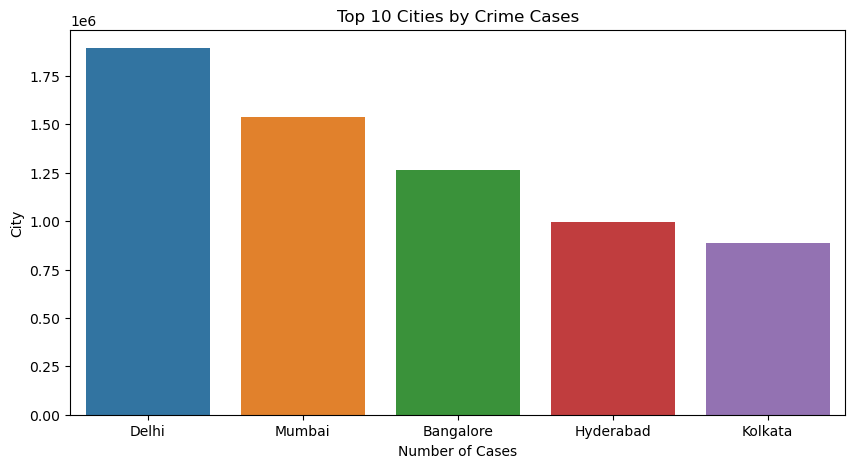

In [106]:
top_cities = df.groupby('City')['Crime Code'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Crime Cases')
plt.xlabel('Number of Cases')
plt.ylabel('City')
plt.show()

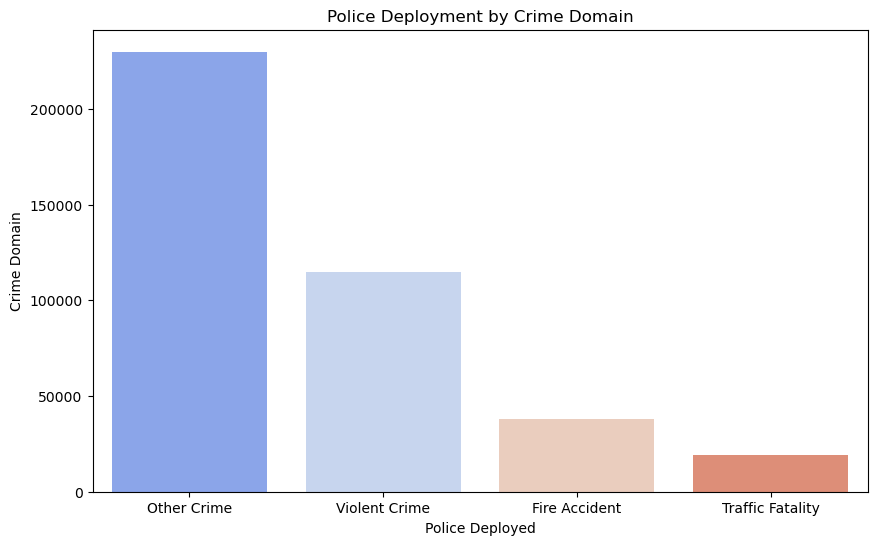

In [105]:
deployment = df.groupby('Crime Domain')['Police Deployed'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=deployment.index, y=deployment.values, palette='coolwarm')
plt.title('Police Deployment by Crime Domain')
plt.xlabel('Police Deployed')
plt.ylabel('Crime Domain')
plt.show()

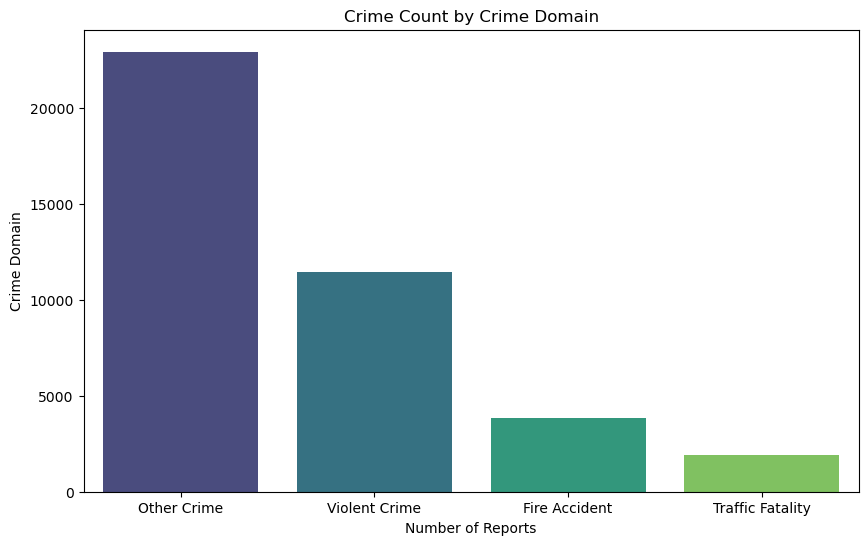

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Crime Domain', order=df['Crime Domain'].value_counts().index, palette='viridis')
plt.title('Crime Count by Crime Domain')
plt.xlabel('Number of Reports')
plt.ylabel('Crime Domain')
plt.show()

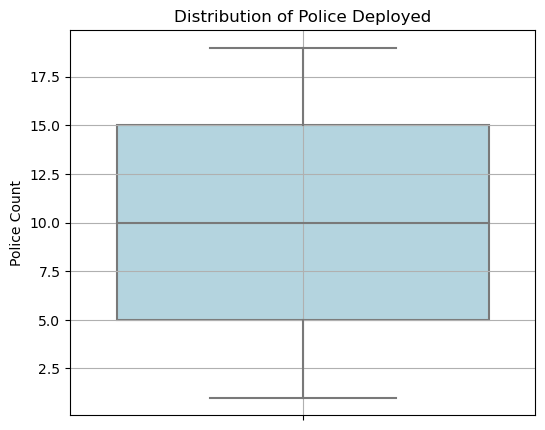

In [15]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, y='Police Deployed', color='lightblue')
plt.title('Distribution of Police Deployed')
plt.ylabel('Police Count')
plt.grid(True)
plt.show()


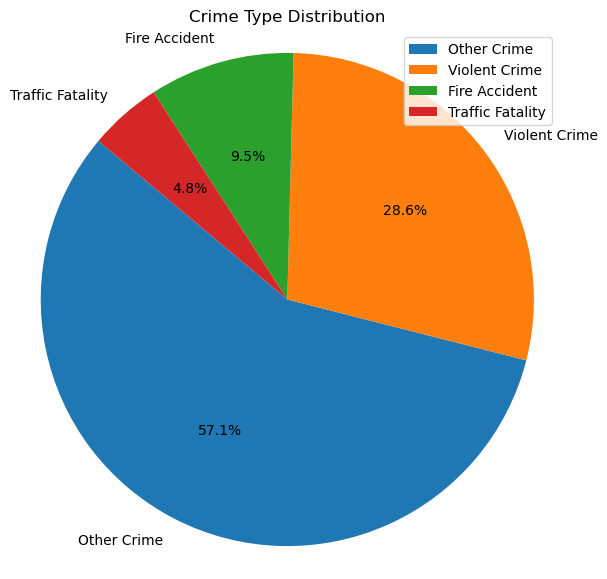

In [19]:
crime_counts = df['Crime Domain'].value_counts().head(6)

plt.figure(figsize=(7,7))
plt.pie(crime_counts.values, labels=crime_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Crime Type Distribution')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

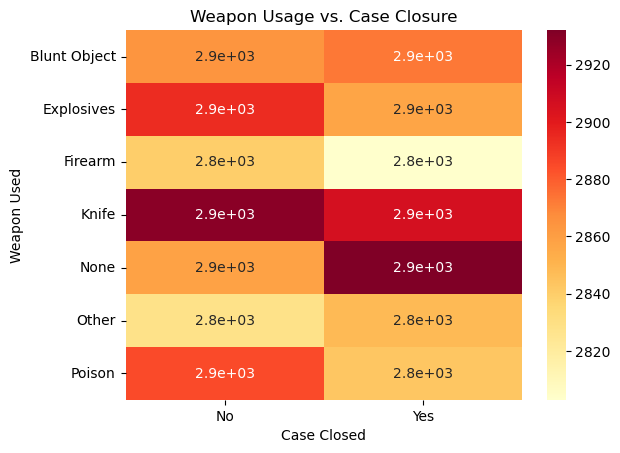

In [19]:
weapon_closure = df.groupby(['Weapon Used', 'Case Closed']).size().unstack().fillna(0)
sns.heatmap(weapon_closure, annot=True, cmap='YlOrRd')
plt.title('Weapon Usage vs. Case Closure')
plt.show()

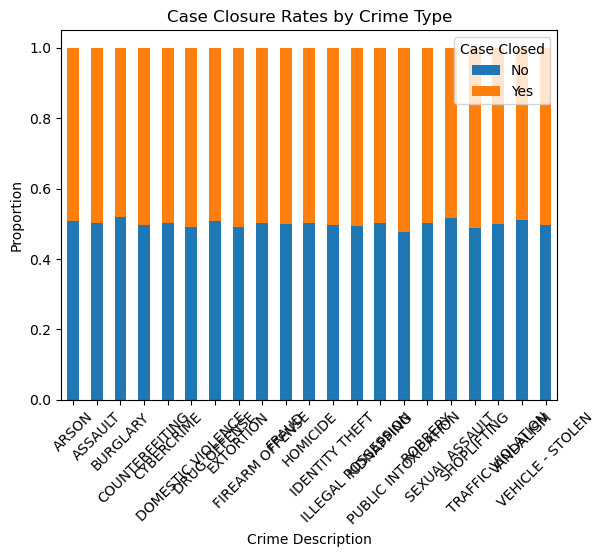

In [26]:
closure_rate = df.groupby('Crime Description')['Case Closed'].value_counts(normalize=True).unstack()
closure_rate.plot(kind='bar', stacked=True)
plt.title('Case Closure Rates by Crime Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

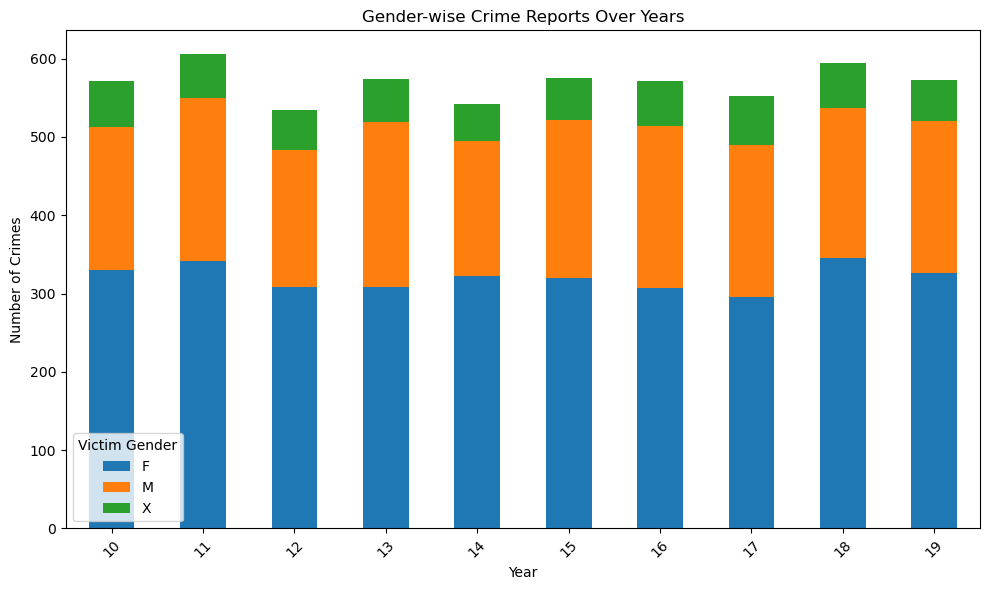

In [30]:
gender_data = df.groupby(['Victim Age', 'Victim Gender'])['Crime Code'].count().unstack().head(10)

gender_data.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Gender-wise Crime Reports Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Conclusions and Key Insights



- Certain cities have higher crime rates than others.
- Most crimes are not resolved
- Weapon usage and case closure rates can be correlated.
- Gender and age distribution of victims vary by crime type.
- Most crimes are not resolved (case not closed), which is a concern.



